. Ingest the iris dataset from the S3:...
. Display the columns, what do you see?
. Create a temporary view called `iris_data`
. Using matplotlib plot the sepal width and sepal height, you can do grouping
. Drop the column that you think are irrelevant
. Create a `VectorAssembler`, including the following columns in your input
.. `SepalLengthCm`
.. `SepalWidthCm"`
.. `PetalLengthCm`
.. `PetalWidthCm`
. Use the vector assembler to transform your data set (without `id`) into a new `DataFrame` called `featureFrame`
. Select the `features` column/feature
. Use `randomSplit` to split to data into `training` and `testing` sets
. Create a `NaiveBayes` model
. Call the model's `fit` with the `training` data
. Call `transform` on the model to determine the prediction of the `feature`++s++
. Show the predictions using `show`

In [2]:
import sys, os
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession, Catalog
from pyspark.sql import DataFrame, DataFrameStatFunctions, DataFrameNaFunctions
from pyspark.sql import functions as F
from pyspark.sql import types as T
from pyspark.sql.types import Row
from subprocess import check_output

SPARK_DRIVER_HOST = check_output(["hostname", "-i"]).decode(encoding="utf-8").strip()
spark_conf = SparkConf()
spark_conf.setAll([
    ('spark.master', 'spark://spark:7077'),
    ('spark.app.name', 'myApp'),
    ('spark.submit.deployMode', 'client'),
    ('spark.ui.showConsoleProgress', 'true'),
    ('spark.eventLog.enabled', 'false'),
    ('spark.logConf', 'false'),
    ('spark.driver.bindAddress', '0.0.0.0'),
    ('spark.driver.host', SPARK_DRIVER_HOST),
    ('spark.jars.packages', 'org.apache.hadoop:hadoop-aws:3.2.0,com.amazonaws:aws-java-sdk-bundle:1.11.704,org.apache.spark:spark-hadoop-cloud_2.12:3.3.0'),
    ("spark.hadoop.fs.s3a.endpoint", 'http://minio:9000'),
    ('spark.hadoop.fs.s3a.access.key', 'minio-root-user'),
    ('spark.hadoop.fs.s3a.secret.key', 'minio-root-password'),
    ('spark.hadoop.fs.s3a.bucket.all.committer.magic.enabled', True),
    ("spark.hadoop.fs.s3a.fast.upload", True),
    ("spark.hadoop.fs.s3a.path.style.access", True),
    ("spark.hadoop.fs.s3a.impl", "org.apache.hadoop.fs.s3a.S3AFileSystem")
])
 
spark_sess          = SparkSession.builder.config(conf=spark_conf).getOrCreate()
spark_ctxt          = spark_sess.sparkContext
spark_reader        = spark_sess.read
spark_streamReader  = spark_sess.readStream
spark_ctxt.setLogLevel("WARN")

IrisDF = spark_sess.read.option("header",True).option("inferSchema", True).csv('s3a://iris/iris.csv')
IrisDF.show(truncate=False)

:: loading settings :: url = jar:file:/opt/bitnami/spark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
org.apache.hadoop#hadoop-aws added as a dependency
com.amazonaws#aws-java-sdk-bundle added as a dependency
org.apache.spark#spark-hadoop-cloud_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ab6c6880-b5cc-4214-819b-f2997aebbb35;1.0
	confs: [default]
	found org.apache.hadoop#hadoop-aws;3.2.0 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.704 in central
	found org.apache.spark#spark-hadoop-cloud_2.12;3.3.0 in central
	found org.apache.hadoop#hadoop-client-runtime;3.3.2 in central
	found org.apache.hadoop#hadoop-client-api;3.3.2 in central
	found org.xerial.snappy#snappy-java;1.1.8.4 in central
	found org.slf4j#slf4j-api;1.7.32 in central
	found commons-logging#commons-logging;1.1.3 in central
	found com.google.code.findbugs#jsr305;3.0.0 in central
	found org.apache.hadoop#hadoop-aws;3.3.2 in central
	found com.amazonaws#aws-java-sdk-bund

22/10/05 16:54:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/05 16:54:07 WARN MetricsConfig: Cannot locate configuration: tried hadoop-metrics2-s3a-file-system.properties,hadoop-metrics2.properties


+---+-------------+------------+-------------+------------+-----------+
|Id |SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|Species    |
+---+-------------+------------+-------------+------------+-----------+
|1  |5.1          |3.5         |1.4          |0.2         |Iris-setosa|
|2  |4.9          |3.0         |1.4          |0.2         |Iris-setosa|
|3  |4.7          |3.2         |1.3          |0.2         |Iris-setosa|
|4  |4.6          |3.1         |1.5          |0.2         |Iris-setosa|
|5  |5.0          |3.6         |1.4          |0.2         |Iris-setosa|
|6  |5.4          |3.9         |1.7          |0.4         |Iris-setosa|
|7  |4.6          |3.4         |1.4          |0.3         |Iris-setosa|
|8  |5.0          |3.4         |1.5          |0.2         |Iris-setosa|
|9  |4.4          |2.9         |1.4          |0.2         |Iris-setosa|
|10 |4.9          |3.1         |1.5          |0.1         |Iris-setosa|
|11 |5.4          |3.7         |1.5          |0.2         |Iris-

In [3]:
from pyspark.ml.feature import VectorAssembler

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Scatter Plot:  


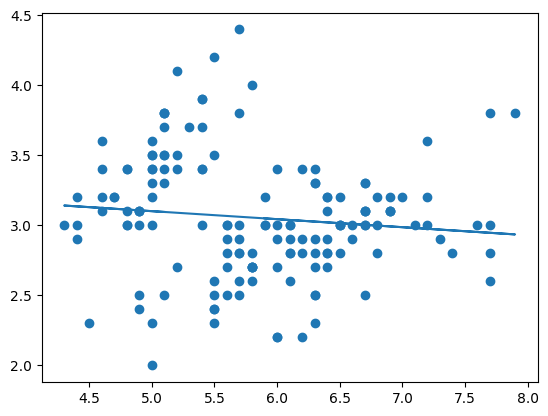

In [5]:
Iris = IrisDF.toPandas()
  
# plotting a scatter plot
print("Scatter Plot:  ")

#find line of best fit
a, b = np.polyfit(Iris["SepalLengthCm"], Iris["SepalWidthCm"], 1)

plt.scatter(Iris["SepalLengthCm"], Iris["SepalWidthCm"])

#add line of best fit to plot
plt.plot(Iris["SepalLengthCm"], a*Iris["SepalLengthCm"]+b)  
plt.show()

In [7]:
IrisDF.select('Species').distinct().show()

+---------------+
|        Species|
+---------------+
| Iris-virginica|
|    Iris-setosa|
|Iris-versicolor|
+---------------+



In [10]:
from pyspark.ml.feature import StringIndexer
lblIndxr = StringIndexer().setInputCol("Species").setOutputCol("SpeciesIndex")
idxRes = lblIndxr.fit(IrisDF).transform(IrisDF)
idxRes.where('SpeciesIndex == 2.0').show(truncate=False)

+---+-------------+------------+-------------+------------+--------------+------------+
|Id |SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|Species       |SpeciesIndex|
+---+-------------+------------+-------------+------------+--------------+------------+
|101|6.3          |3.3         |6.0          |2.5         |Iris-virginica|2.0         |
|102|5.8          |2.7         |5.1          |1.9         |Iris-virginica|2.0         |
|103|7.1          |3.0         |5.9          |2.1         |Iris-virginica|2.0         |
|104|6.3          |2.9         |5.6          |1.8         |Iris-virginica|2.0         |
|105|6.5          |3.0         |5.8          |2.2         |Iris-virginica|2.0         |
|106|7.6          |3.0         |6.6          |2.1         |Iris-virginica|2.0         |
|107|4.9          |2.5         |4.5          |1.7         |Iris-virginica|2.0         |
|108|7.3          |2.9         |6.3          |1.8         |Iris-virginica|2.0         |
|109|6.7          |2.5         |

In [26]:
from pyspark.ml.feature import VectorAssembler
assemble=VectorAssembler(inputCols=[
'SepalLengthCm',
'SepalWidthCm',
'PetalLengthCm',
'PetalWidthCm',
'SpeciesIndex'],outputCol = 'features')
assembled_data=assemble.transform(idxRes)

In [48]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='features', \
metricName='silhouette', distanceMeasure='squaredEuclidean')

for K in range(2,11):

    KMeans_=KMeans(featuresCol='features', k=K)

    KMeans_fit=KMeans_.fit(assembled_data)

    KMeans_transform=KMeans_fit.transform(assembled_data) 

    evaluation_score=evaluator.evaluate(KMeans_transform)

    silhouette_scores.append(evaluation_score)

Text(0, 0.5, 'Silhouette Score')

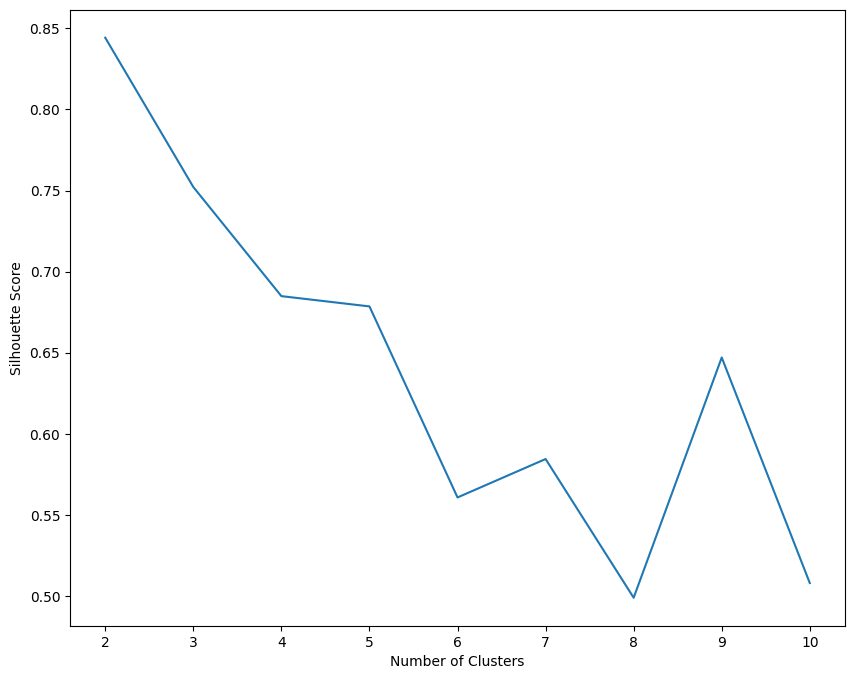

In [29]:

fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

In [30]:
KMeans_=KMeans(featuresCol='features', k=2) 
KMeans_Model=KMeans_.fit(assembled_data)
KMeans_Assignments=KMeans_Model.transform(assembled_data)

In [32]:
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(assembled_data)
pca_transformed = pca_model.transform(assembled_data)

In [43]:
!pip install seaborn
!pip3 install numpy
import seaborn as sns
import numpy as np

You should consider upgrading via the '/opt/bitnami/spark/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/bitnami/spark/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())
cluster_assignment = np.array(KMeans_Assignments.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

pca_data = np.hstack((x_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()

plt.show()

22/10/05 17:22:06 WARN TaskSetManager: Lost task 0.0 in stage 555.0 (TID 539) (172.18.0.6 executor 0): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/worker.py", line 686, in main
    process()
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/worker.py", line 678, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 273, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 151, in load_stream
    yield self._read_with_length(stream)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 173, in _read_with_length
    return self.loads(obj)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
  File "

22/10/05 17:22:07 ERROR TaskSetManager: Task 0 in stage 555.0 failed 4 times; aborting job


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 555.0 failed 4 times, most recent failure: Lost task 0.3 in stage 555.0 (TID 542) (172.18.0.6 executor 0): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/worker.py", line 686, in main
    process()
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/worker.py", line 678, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 273, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 151, in load_stream
    yield self._read_with_length(stream)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 173, in _read_with_length
    return self.loads(obj)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1088, in _parse_datatype_json_string
    return _parse_datatype_json_value(json.loads(json_string))
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1113, in _parse_datatype_json_value
    return _all_complex_types[tpe].fromJson(json_value)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 758, in fromJson
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 758, in <listcomp>
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 582, in fromJson
    _parse_datatype_json_value(json["type"]),
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1115, in _parse_datatype_json_value
    return UserDefinedType.fromJson(json_value)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 927, in fromJson
    m = __import__(pyModule, globals(), locals(), [pyClass])
  File "<frozen zipimport>", line 259, in load_module
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/ml/__init__.py", line 22, in <module>
    from pyspark.ml.base import (
  File "<frozen zipimport>", line 259, in load_module
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/ml/base.py", line 40, in <module>
    from pyspark.ml.param import P
  File "<frozen zipimport>", line 259, in load_module
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/ml/param/__init__.py", line 32, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:747)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:512)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1021)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2268)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2672)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2608)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2607)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2607)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1182)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1182)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2860)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2802)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2791)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:952)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2228)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2249)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2268)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2293)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1021)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:406)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1020)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:180)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/worker.py", line 686, in main
    process()
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/worker.py", line 678, in process
    serializer.dump_stream(out_iter, outfile)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 273, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 151, in load_stream
    yield self._read_with_length(stream)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 173, in _read_with_length
    return self.loads(obj)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/serializers.py", line 471, in loads
    return cloudpickle.loads(obj, encoding=encoding)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1088, in _parse_datatype_json_string
    return _parse_datatype_json_value(json.loads(json_string))
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1113, in _parse_datatype_json_value
    return _all_complex_types[tpe].fromJson(json_value)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 758, in fromJson
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 758, in <listcomp>
    return StructType([StructField.fromJson(f) for f in json["fields"]])
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 582, in fromJson
    _parse_datatype_json_value(json["type"]),
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 1115, in _parse_datatype_json_value
    return UserDefinedType.fromJson(json_value)
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/sql/types.py", line 927, in fromJson
    m = __import__(pyModule, globals(), locals(), [pyClass])
  File "<frozen zipimport>", line 259, in load_module
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/ml/__init__.py", line 22, in <module>
    from pyspark.ml.base import (
  File "<frozen zipimport>", line 259, in load_module
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/ml/base.py", line 40, in <module>
    from pyspark.ml.param import P
  File "<frozen zipimport>", line 259, in load_module
  File "/opt/bitnami/spark/python/lib/pyspark.zip/pyspark/ml/param/__init__.py", line 32, in <module>
    import numpy as np
ModuleNotFoundError: No module named 'numpy'

	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.handlePythonException(PythonRunner.scala:559)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:765)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:747)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:512)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1021)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2268)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:136)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:548)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1504)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:551)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
